In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

# Divide the dataset into Train-test split and do the standard scalling

In [3]:
def split_transform(df,split_ratio):
    X=df.iloc[:,1:-1]
    Y=df.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=split_ratio,shuffle=True)

    scaler=StandardScaler()
    X_sc_train = scaler.fit_transform(X_train)
    X_sc_test = scaler.transform(X_test)

    print("The number of samples in the Training set is {}".format(len(X_sc_train)))
    print("The number of samples in the Test set is {}".format(len(X_sc_test)))
    
    return  X_sc_train, X_sc_test,y_train,y_test,scaler

# Import both Dataset

In [4]:
df1=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Lim_solar_data.csv')
df2=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Max_solar_data.csv')

df = pd.concat([df1,df2],ignore_index=True,axis=0)

df.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000028,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,0.010027,1.539215,101.251221,143.261719,0.086425,-0.490112,0.349971,-42.311096,149.029083,-108.377482,1.000000,50.000000,1.000000,50.000000,F0L
2,0.020026,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
3,0.030025,1.577057,101.287842,142.968750,0.106566,-0.456543,0.336543,-42.106171,150.222473,-109.249420,0.461228,49.921509,151.655756,50.078264,F0L
4,0.040024,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L


In [5]:
df['label'].unique()

array(['F0L', 'F1L', 'F2L', 'F3L', 'F4L', 'F5L', 'F6L', 'F7L', 'F0M',
       'F1M', 'F2M', 'F3M', 'F4M', 'F5M', 'F6M', 'F7M'], dtype=object)

In [6]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.3)

The number of samples in the Training set is 15145
The number of samples in the Test set is 6491


In [7]:
encoder = LabelEncoder()

In [8]:
y_train

16022    F4M
5436     F4L
8548     F6L
7205     F5L
667      F0L
        ... 
13844    F2M
15228    F3M
11582    F0M
12289    F0M
17112    F4M
Name: label, Length: 15145, dtype: object

In [9]:
encoded_y = encoder.fit_transform(y_train)

In [10]:
encoded_y

array([ 9,  8, 12, ...,  1,  1,  9])

In [11]:
to_categorical(encoded_y)[0]  # One Hot encoding

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

# Divide the dataset into Train-test split and do the standard scalling

In [13]:
def split_transform(df,split_ratio):
    X=df.iloc[:,1:-1]
    Y=df.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=split_ratio,shuffle=True)

    scaler=StandardScaler()
    X_sc_train = scaler.fit_transform(X_train)
    X_sc_test = scaler.transform(X_test)

    print("The number of samples in the Training set is {}".format(len(X_sc_train)))
    print("The number of samples in the Test set is {}".format(len(X_sc_test)))
    
    return  X_sc_train, X_sc_test,y_train,y_test,scaler

# Import both Dataset

In [14]:
df1=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Lim_solar_data.csv')
df2=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Max_solar_data.csv')

df = pd.concat([df1,df2],ignore_index=True,axis=0)

df.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000028,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,0.010027,1.539215,101.251221,143.261719,0.086425,-0.490112,0.349971,-42.311096,149.029083,-108.377482,1.000000,50.000000,1.000000,50.000000,F0L
2,0.020026,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
3,0.030025,1.577057,101.287842,142.968750,0.106566,-0.456543,0.336543,-42.106171,150.222473,-109.249420,0.461228,49.921509,151.655756,50.078264,F0L
4,0.040024,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L


In [15]:
df['label'].unique()

array(['F0L', 'F1L', 'F2L', 'F3L', 'F4L', 'F5L', 'F6L', 'F7L', 'F0M',
       'F1M', 'F2M', 'F3M', 'F4M', 'F5M', 'F6M', 'F7M'], dtype=object)

In [16]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.3)

The number of samples in the Training set is 15145
The number of samples in the Test set is 6491


In [17]:
encoder= LabelEncoder()

In [18]:
y_train

9991     F7L
18199    F5M
7016     F5L
9187     F6L
1005     F0L
        ... 
6384     F4L
7755     F5L
20511    F7M
418      F0L
10930    F7L
Name: label, Length: 15145, dtype: object

In [19]:
encoded_y = encoder.fit_transform(y_train)
encoded_y

array([14, 11, 10, ..., 15,  0, 14])

In [20]:
to_categorical(encoded_y)[0]  # One Hot encoding

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
      dtype=float32)

# One Hot Encoding the Fault Classes

In [21]:
encoder= LabelEncoder()
encoder.fit(y_train)
encoded_y = encoder.transform(y_train)
dummy_y = to_categorical(encoded_y)

encoded_y_test = encoder.transform(y_test)
dummy_y_test = to_categorical(encoded_y_test)

In [22]:
encoder.classes_


array(['F0L', 'F0M', 'F1L', 'F1M', 'F2L', 'F2M', 'F3L', 'F3M', 'F4L',
       'F4M', 'F5L', 'F5M', 'F6L', 'F6M', 'F7L', 'F7M'], dtype=object)

# Building ANN Model

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import EarlyStopping

In [24]:
n_inputs = X_sc_train.shape[1]
output_cls = len(encoder.classes_)

# define input
visible = Input(shape=(n_inputs,))

# define Hidden
e = Dense(50,activation='relu')(visible)
e = Dense(100,activation='relu')(e)

# define output
output = Dense(output_cls, activation='softmax')(e)

model = Model(inputs= visible, outputs=output)

# compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',    # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 50)                700       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 16)                1616      
                                                                 
Total params: 7,416
Trainable params: 7,416
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Define early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=40, verbose=1)

# fit the autoencoder model to reconstruct input
history = model.fit(X_sc_train,   ## Training Feature
                    dummy_y,      ## Training Labels
                    epochs=500,
                    batch_size=500,
                    verbose=2,
                    validation_data=(X_sc_test,dummy_y_test),
                    callbacks = early_stop,
                    shuffle=True)

#After training, we can plot the learning curves for the train and test sets to confirm the model learned the reconstruction problem well.
model.save(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/Trained_models/ANN.h5')

Epoch 1/500
31/31 - 1s - loss: 2.5554 - accuracy: 0.2201 - val_loss: 2.3149 - val_accuracy: 0.3950 - 935ms/epoch - 30ms/step
Epoch 2/500
31/31 - 0s - loss: 2.0823 - accuracy: 0.4910 - val_loss: 1.7901 - val_accuracy: 0.6167 - 181ms/epoch - 6ms/step
Epoch 3/500
31/31 - 0s - loss: 1.5453 - accuracy: 0.6644 - val_loss: 1.2751 - val_accuracy: 0.7264 - 121ms/epoch - 4ms/step
Epoch 4/500
31/31 - 0s - loss: 1.1179 - accuracy: 0.7236 - val_loss: 0.9449 - val_accuracy: 0.7426 - 123ms/epoch - 4ms/step
Epoch 5/500
31/31 - 0s - loss: 0.8579 - accuracy: 0.7517 - val_loss: 0.7474 - val_accuracy: 0.7849 - 122ms/epoch - 4ms/step
Epoch 6/500
31/31 - 0s - loss: 0.6978 - accuracy: 0.7853 - val_loss: 0.6266 - val_accuracy: 0.8113 - 122ms/epoch - 4ms/step
Epoch 7/500
31/31 - 0s - loss: 0.5950 - accuracy: 0.8089 - val_loss: 0.5431 - val_accuracy: 0.8407 - 122ms/epoch - 4ms/step
Epoch 8/500
31/31 - 0s - loss: 0.5236 - accuracy: 0.8320 - val_loss: 0.4849 - val_accuracy: 0.8472 - 140ms/epoch - 5ms/step
Epoch 9

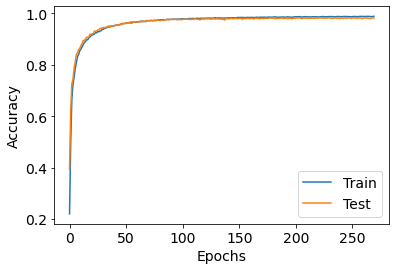

In [26]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Using the Trained Model For Validation

In [27]:
model.predict(X_sc_test)[0].argmax()

203/203 [==============================] - 0s 1ms/step


13

In [28]:
encoder.inverse_transform([12])

array(['F6L'], dtype=object)

In [31]:
y_pred = model.predict(X_sc_test)
y_pred = y_pred.argmax(axis=1)
y_pred = encoder.inverse_transform(y_pred)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


Acc=accuracy_score(y_test,y_pred)
Pre=precision_score(y_test,y_pred,average='weighted')
Rec= recall_score(y_test,y_pred,average='weighted')
F1= f1_score(y_test,y_pred,average='weighted')

203/203 [==============================] - 0s 1ms/step


In [32]:
print("The average accuracy is -> {}".format(Acc))
print("")
print("The weighted Precision is -> {}".format(Pre))
print("")
print("The weighted Recall is -> {}".format(Rec))
print("")
print("The F1 score is -> {}".format(F1))
print("")

The average accuracy is -> 0.9822831613002619

The weighted Precision is -> 0.9822772954872911

The weighted Recall is -> 0.9822831613002619

The F1 score is -> 0.9822377433625707



# Plot the Confusion Matrix

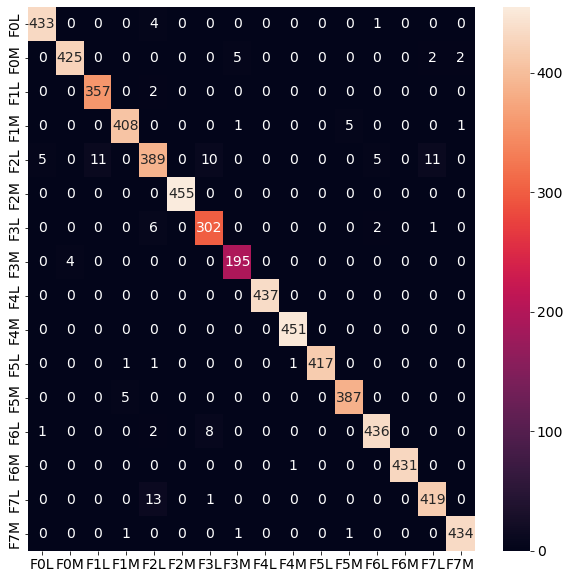

In [34]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d',xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

# MissClassification Rate

In [38]:
arr = np.array(y_test != y_pred)*1
count = arr[arr==1].shape[0]
print("Missclassification rate is {}%".format((count/len(y_test))*100))

Missclassification rate is 1.77168386997381%


203/203 [==============================] - 0s 2ms/step


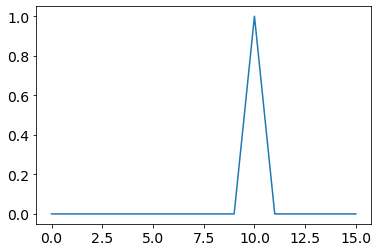

203/203 [==============================] - 0s 2ms/step


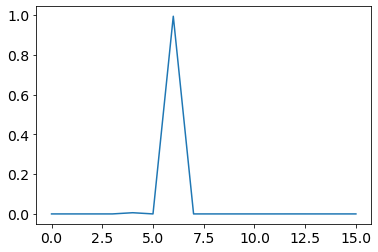

203/203 [==============================] - 0s 1ms/step


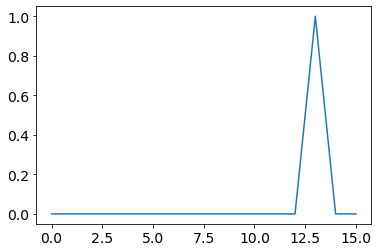

203/203 [==============================] - 0s 1ms/step


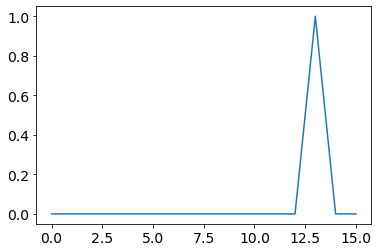

203/203 [==============================] - 0s 1ms/step


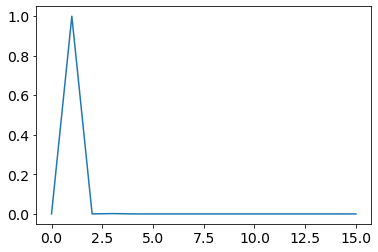

203/203 [==============================] - 0s 1ms/step


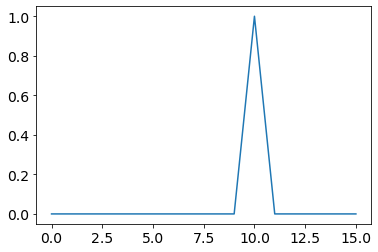

203/203 [==============================] - 0s 1ms/step


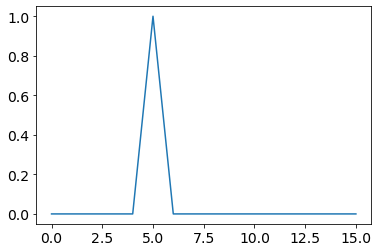

203/203 [==============================] - 0s 1ms/step


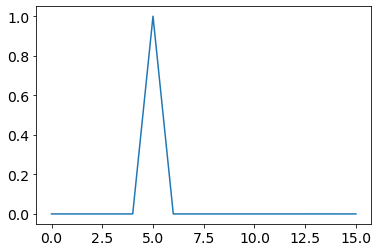

203/203 [==============================] - 0s 1ms/step


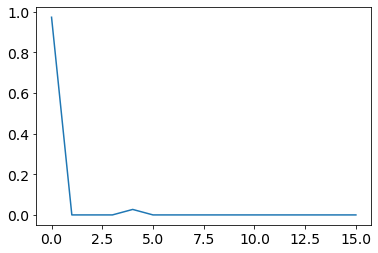

203/203 [==============================] - 0s 1ms/step


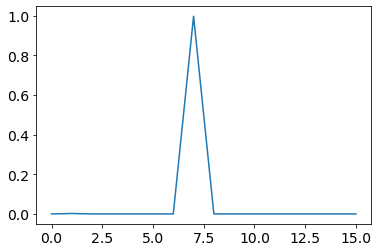

203/203 [==============================] - 0s 1ms/step


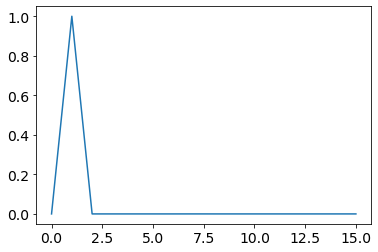

203/203 [==============================] - 0s 1ms/step


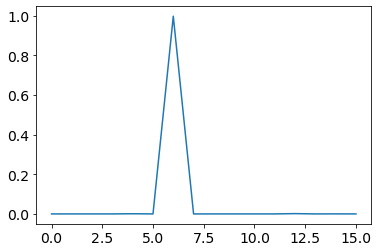

203/203 [==============================] - 0s 1ms/step


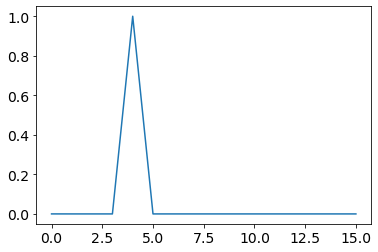

203/203 [==============================] - 0s 1ms/step


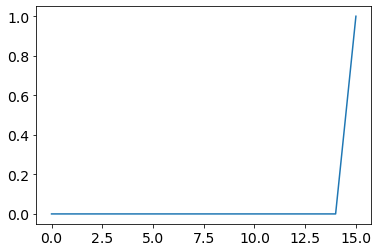

203/203 [==============================] - 0s 1ms/step


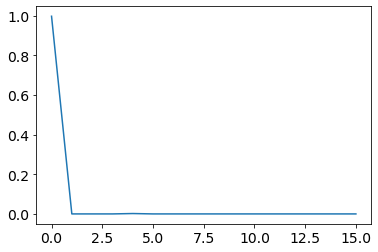

203/203 [==============================] - 0s 1ms/step


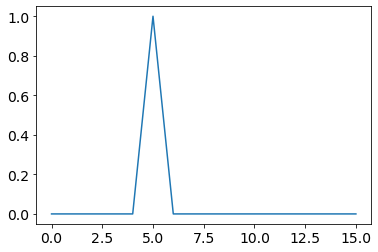

203/203 [==============================] - 0s 1ms/step


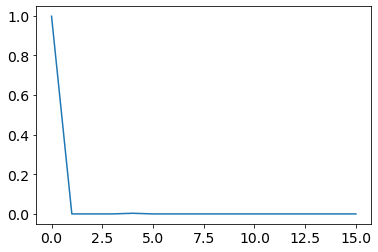

203/203 [==============================] - 0s 1ms/step


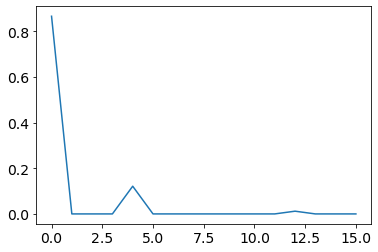

203/203 [==============================] - 0s 1ms/step


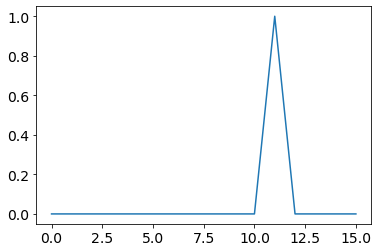

203/203 [==============================] - 0s 1ms/step


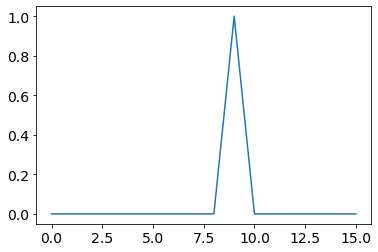

203/203 [==============================] - 0s 1ms/step


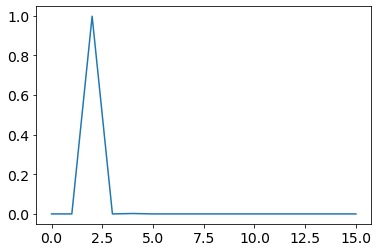

203/203 [==============================] - 0s 1ms/step


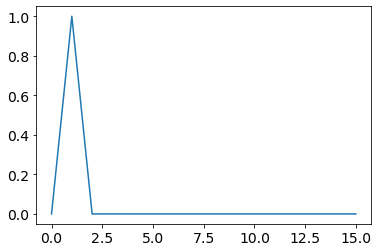

203/203 [==============================] - 0s 1ms/step


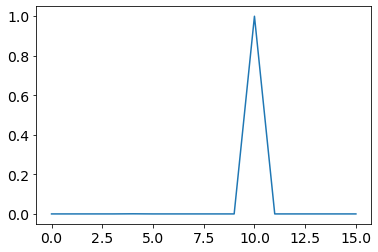

203/203 [==============================] - 0s 1ms/step


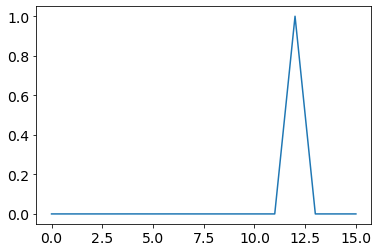

203/203 [==============================] - 0s 1ms/step


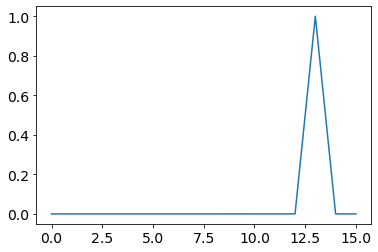

203/203 [==============================] - 0s 1ms/step


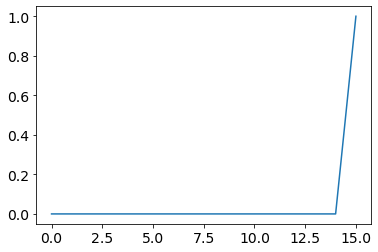

203/203 [==============================] - 0s 1ms/step


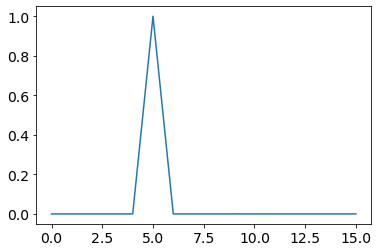

203/203 [==============================] - 0s 1ms/step


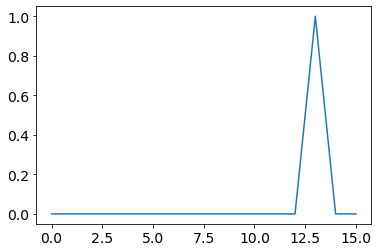

203/203 [==============================] - 0s 1ms/step


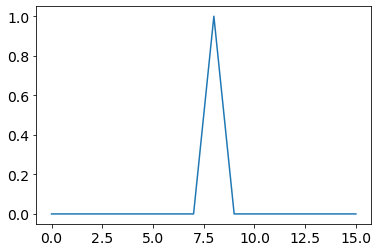

203/203 [==============================] - 0s 1ms/step


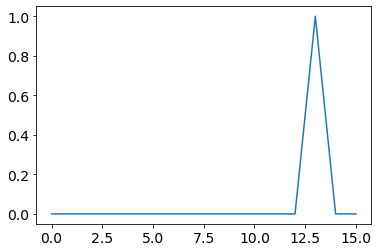

203/203 [==============================] - 0s 1ms/step


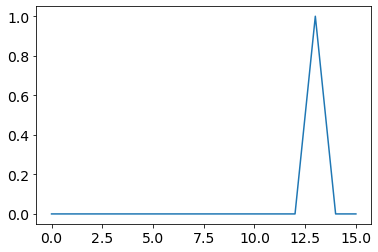

203/203 [==============================] - 0s 1ms/step


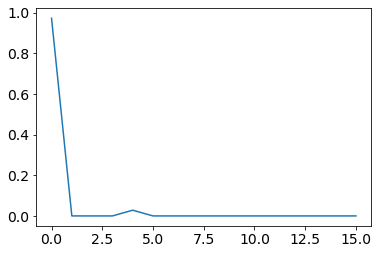

203/203 [==============================] - 0s 1ms/step


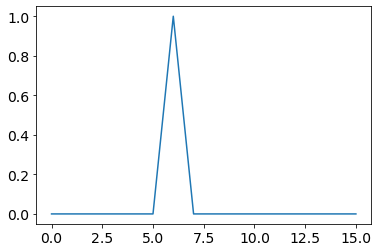

203/203 [==============================] - 0s 1ms/step


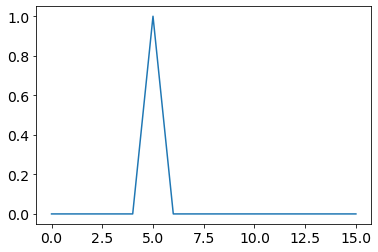

203/203 [==============================] - 0s 1ms/step


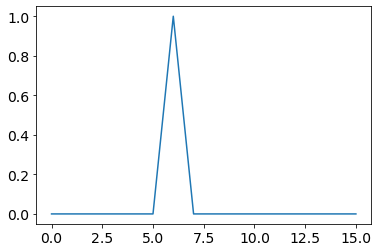

203/203 [==============================] - 0s 1ms/step


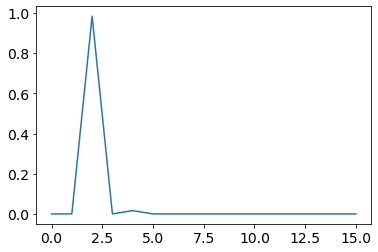

203/203 [==============================] - 0s 1ms/step


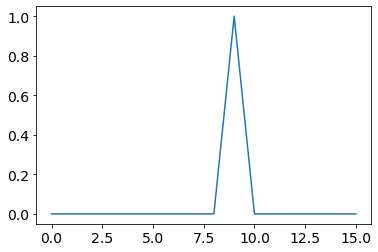

203/203 [==============================] - 0s 1ms/step


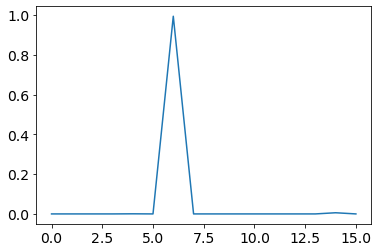

203/203 [==============================] - 0s 1ms/step


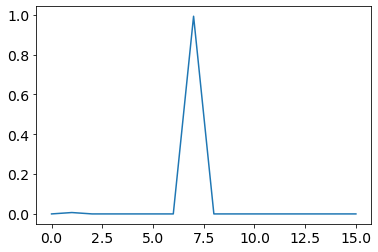

203/203 [==============================] - 0s 1ms/step


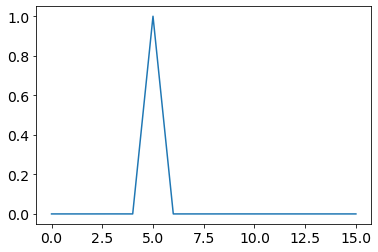

203/203 [==============================] - 0s 1ms/step


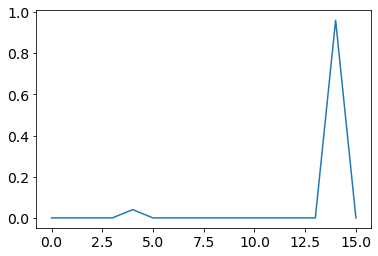

203/203 [==============================] - 0s 1ms/step


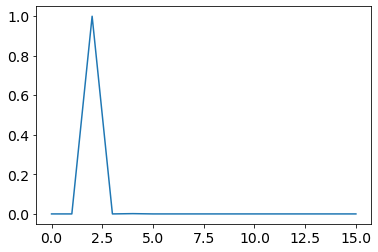

203/203 [==============================] - 0s 1ms/step


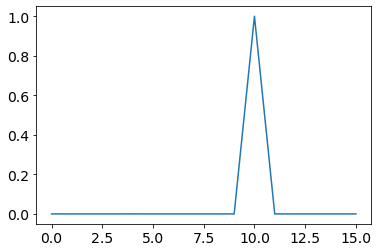

203/203 [==============================] - 0s 1ms/step


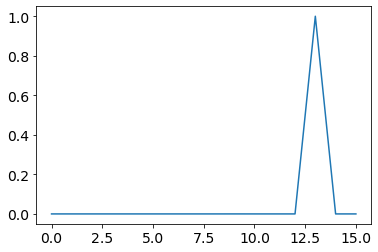

203/203 [==============================] - 0s 1ms/step


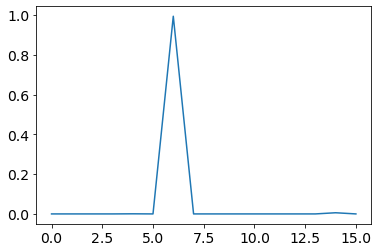

203/203 [==============================] - 0s 1ms/step


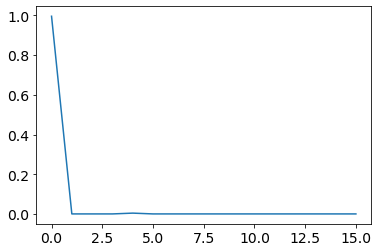

203/203 [==============================] - 0s 1ms/step


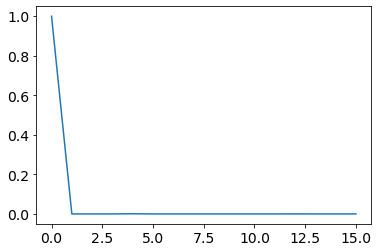

203/203 [==============================] - 0s 1ms/step


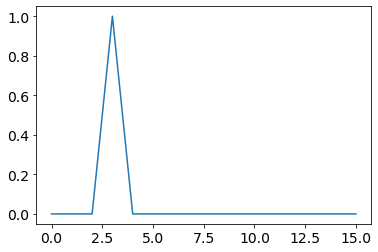

203/203 [==============================] - 0s 1ms/step


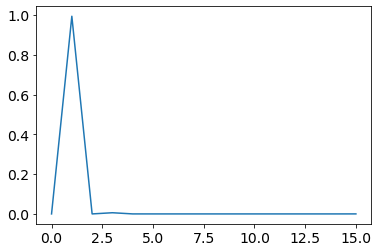

203/203 [==============================] - 0s 1ms/step


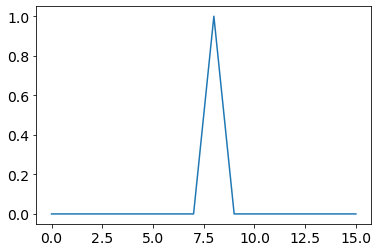

203/203 [==============================] - 0s 1ms/step


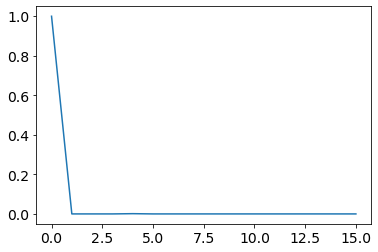

203/203 [==============================] - 0s 1ms/step


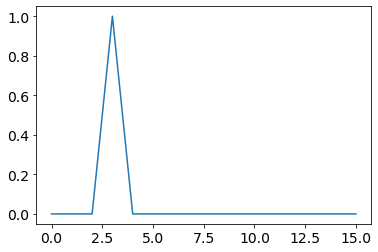

203/203 [==============================] - 0s 1ms/step


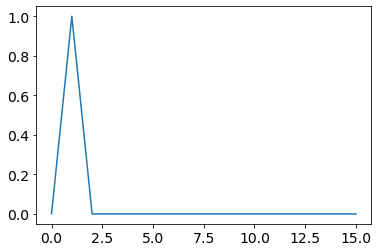

203/203 [==============================] - 0s 1ms/step


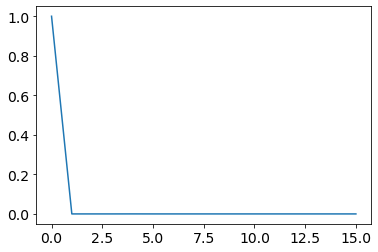

203/203 [==============================] - 0s 1ms/step


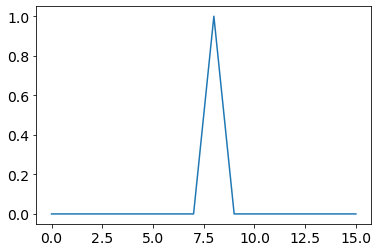

203/203 [==============================] - 0s 1ms/step


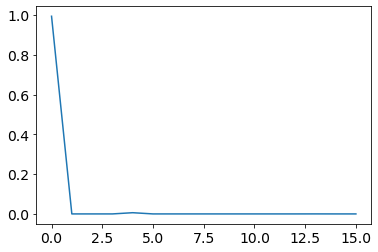

203/203 [==============================] - 0s 1ms/step


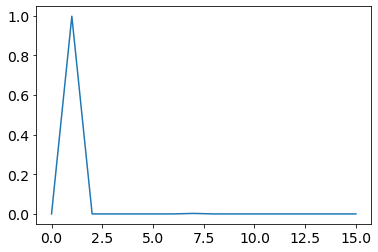

203/203 [==============================] - 0s 1ms/step


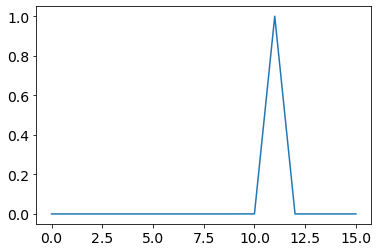

203/203 [==============================] - 0s 1ms/step


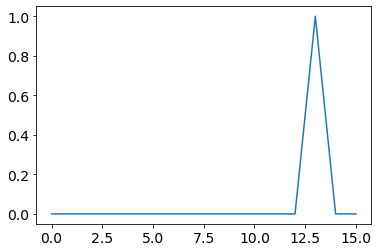

203/203 [==============================] - 0s 1ms/step


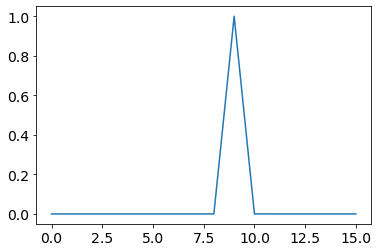

203/203 [==============================] - 0s 1ms/step


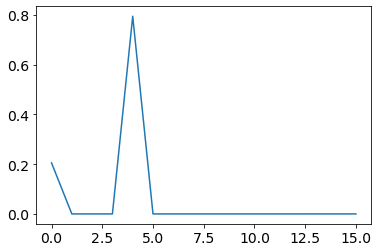

203/203 [==============================] - 0s 1ms/step


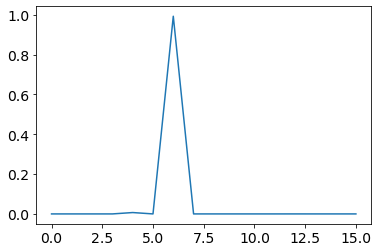

203/203 [==============================] - 0s 1ms/step


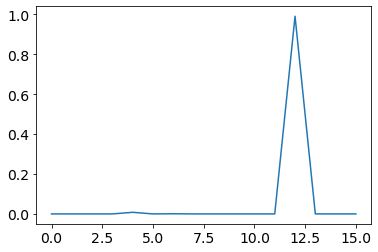

203/203 [==============================] - 0s 1ms/step


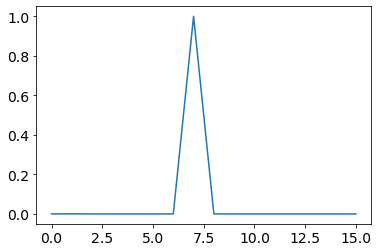

203/203 [==============================] - 0s 1ms/step


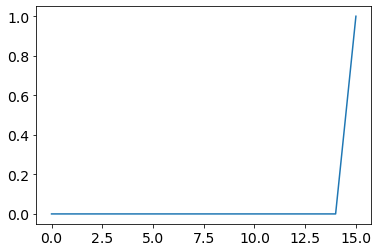

203/203 [==============================] - 0s 1ms/step


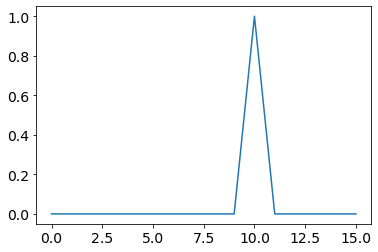

203/203 [==============================] - 0s 1ms/step


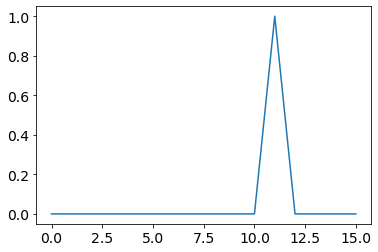

203/203 [==============================] - 0s 1ms/step


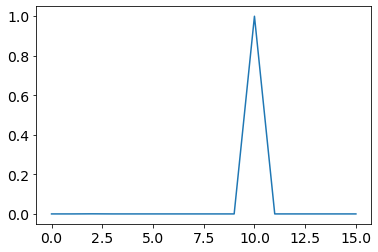

203/203 [==============================] - 0s 1ms/step


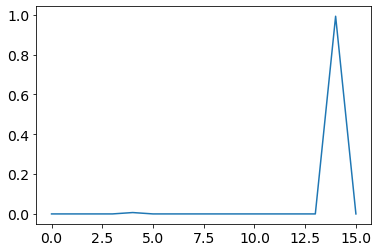

203/203 [==============================] - 0s 1ms/step


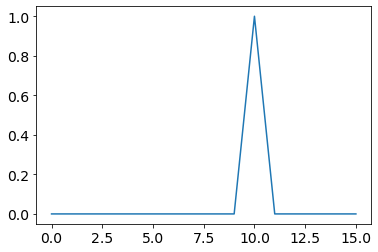

203/203 [==============================] - 0s 1ms/step


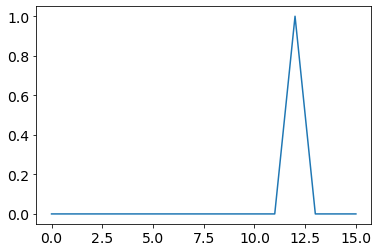

203/203 [==============================] - 0s 1ms/step


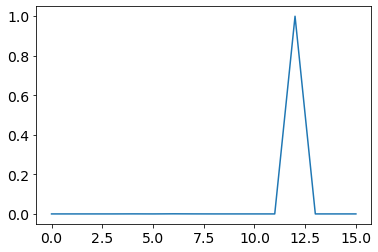

203/203 [==============================] - 0s 1ms/step


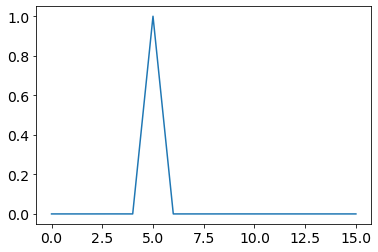

203/203 [==============================] - 0s 1ms/step


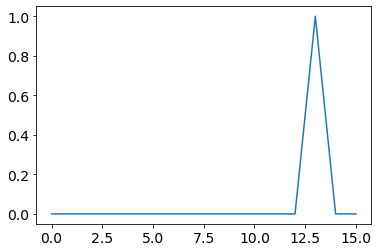

203/203 [==============================] - 0s 1ms/step


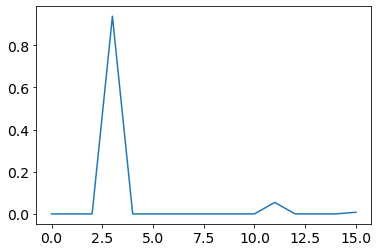

203/203 [==============================] - 0s 1ms/step


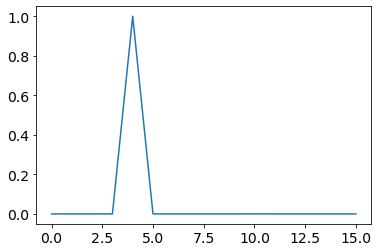

203/203 [==============================] - 0s 1ms/step


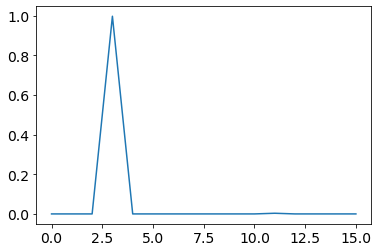

203/203 [==============================] - 0s 1ms/step


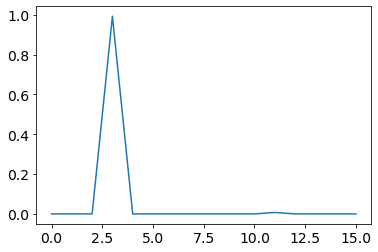

203/203 [==============================] - 0s 1ms/step


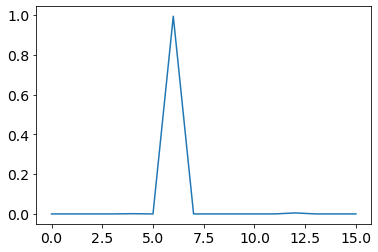

203/203 [==============================] - 0s 1ms/step


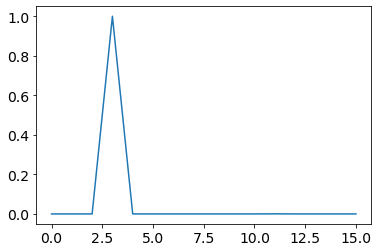

203/203 [==============================] - 0s 1ms/step


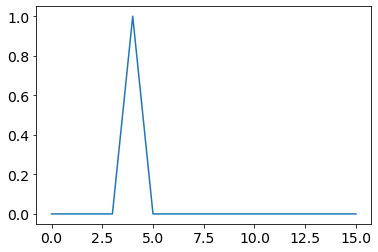

203/203 [==============================] - 0s 1ms/step


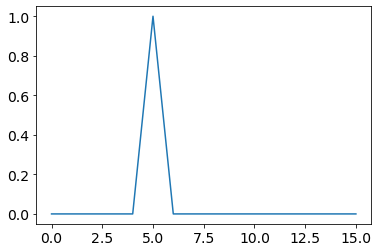

203/203 [==============================] - 0s 1ms/step


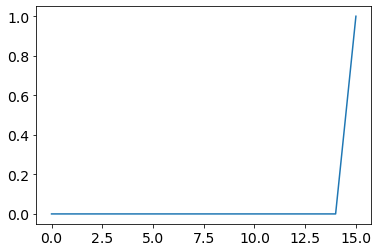

203/203 [==============================] - 0s 1ms/step


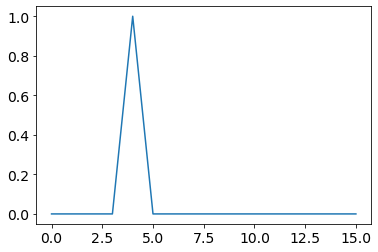

203/203 [==============================] - 0s 1ms/step


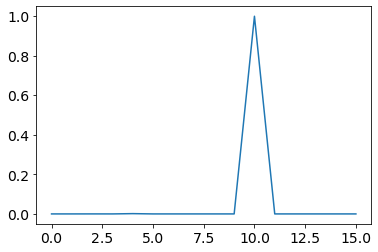

203/203 [==============================] - 0s 1ms/step


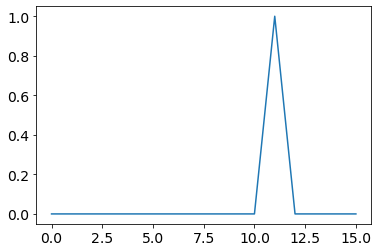

203/203 [==============================] - 0s 2ms/step


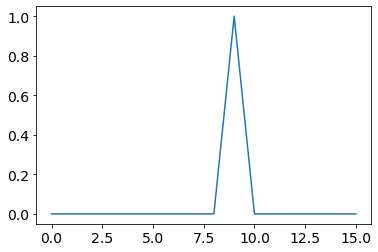

203/203 [==============================] - 0s 1ms/step


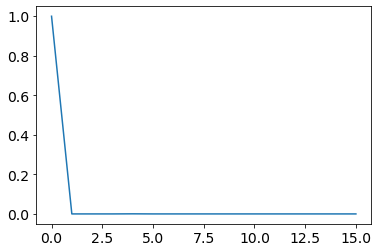

203/203 [==============================] - 0s 1ms/step


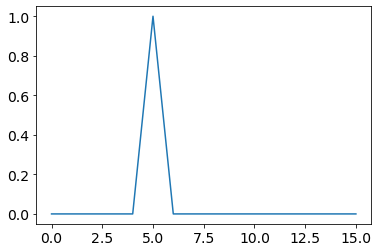

203/203 [==============================] - 0s 1ms/step


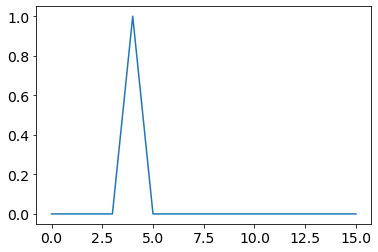

203/203 [==============================] - 0s 1ms/step


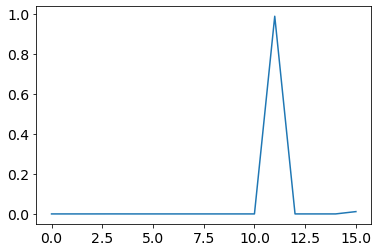

203/203 [==============================] - 0s 1ms/step


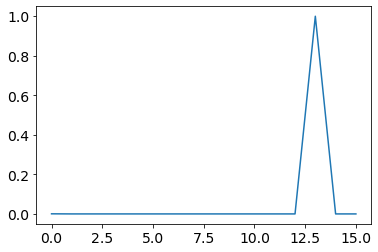

203/203 [==============================] - 0s 1ms/step


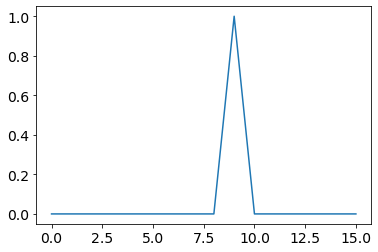

203/203 [==============================] - 0s 2ms/step


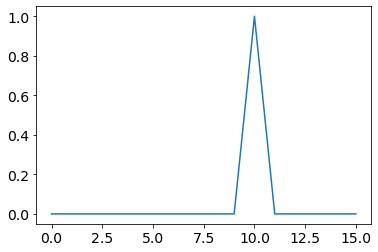

203/203 [==============================] - 0s 1ms/step


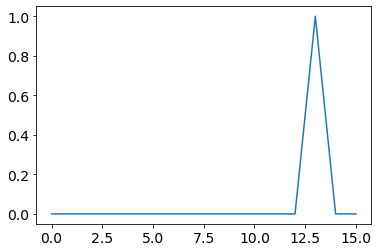

203/203 [==============================] - 0s 1ms/step


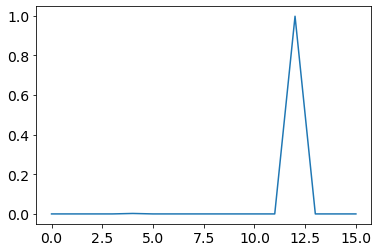

203/203 [==============================] - 0s 1ms/step


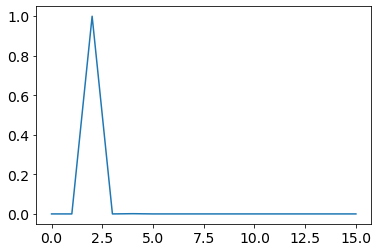

203/203 [==============================] - 0s 1ms/step


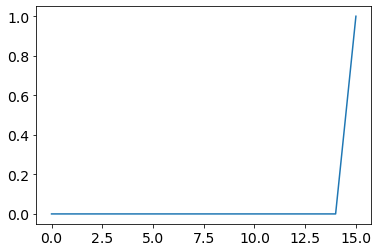

203/203 [==============================] - 0s 1ms/step


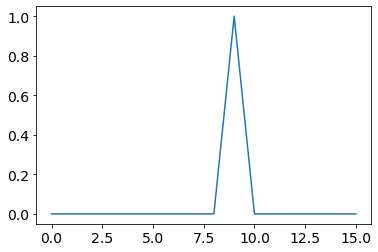

203/203 [==============================] - 0s 1ms/step


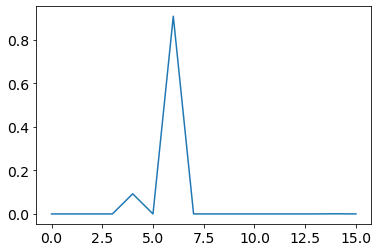

In [46]:
for i in range(100):
  plt.plot(model.predict(X_sc_test)[np.random.randint(1,1000,1)[0]])
  plt.show()